<a href="https://colab.research.google.com/github/Pawan-choudhary/EDA-Case-Study/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
plt.rcParams['figure.figsize'] = (20,10)

In [ ]:
!gdown 1q8KKl03WBxrhcwCZcLDrlavVYyUfUdlf

Downloading...
From: https://drive.google.com/uc?id=1q8KKl03WBxrhcwCZcLDrlavVYyUfUdlf
To: /content/myntrasales.xlsx
100% 13.7k/13.7k [00:00<00:00, 37.1MB/s]


In [ ]:
myntra_sales = pd.read_excel("/content/myntrasales.xlsx")
myntra_sales.head()

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


In [ ]:
myntra_sales.dtypes

DATE     datetime64[ns]
Sales           float64
dtype: object

In [ ]:
# if data type not in datetime formate use
# pd.to_datetime("colname")

In [ ]:
myntra_sales.shape

(217, 2)

In [ ]:
myntra_sales.Sales.describe()

count      198.000000
mean     10842.757576
std       2605.006293
min        108.000000
25%       8856.000000
50%      10745.000000
75%      12399.750000
max      23740.000000
Name: Sales, dtype: float64

In [ ]:
myntra_sales.DATE.describe()

count                     217
unique                    217
top       2001-01-01 00:00:00
freq                        1
first     2001-01-01 00:00:00
last      2019-01-01 00:00:00
Name: DATE, dtype: object

18 years and 1 day of data

In [ ]:
18*12+1

217

In [ ]:
myntra_sales.index

RangeIndex(start=0, stop=217, step=1)

In [ ]:
myntra_sales.head()

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


# Data Preprocessing
* Setting index as data
* Perform linear interpolation
* Taking care of anomalies by clipping values using quantile
* Plotting the resultant time series

Whenever work on time-seris data, its always a good idea to use Date as an index value. Its actually gone be very helpful.

In [ ]:
myntra_sales.set_index(['DATE'], inplace=True)

In [ ]:
myntra_sales.head()

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0


In [ ]:
myntra_sales.index

DatetimeIndex(['2001-01-01', '2001-02-01', '2001-03-01', '2001-04-01',
               '2001-05-01', '2001-06-01', '2001-07-01', '2001-08-01',
               '2001-09-01', '2001-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=217, freq=None)

<Axes: xlabel='DATE'>

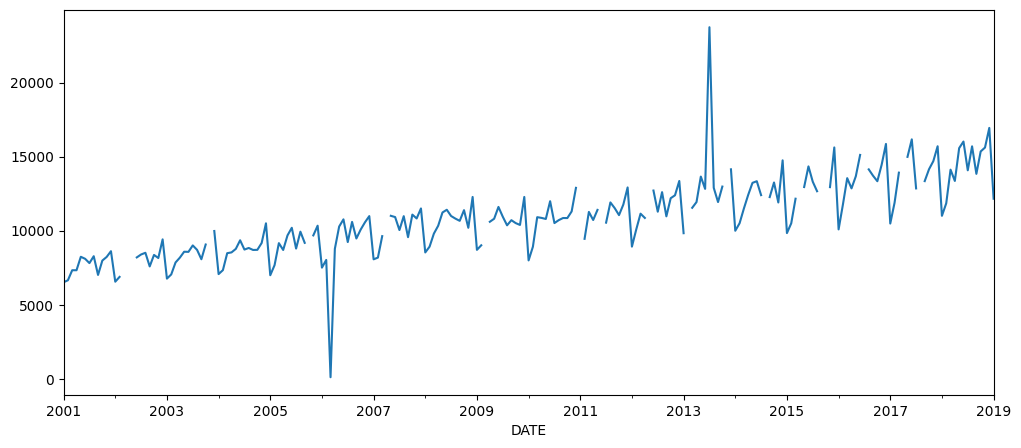

In [ ]:
plt.figure(figsize=(12,5))
myntra_sales.Sales.plot()

**Observation:**
1. Some missing data information
2. Two unusual spikes/anomalies(something that deviates from what is standard, normal, or expected)

In [ ]:
myntra_sales.isna().sum()

Sales    19
dtype: int64

In [ ]:
myntra_sales.loc[myntra_sales.Sales.isna()]

,Sales
DATE,
2002-03-01,NaN
2002-04-01,NaN
2002-05-01,NaN
2003-11-01,NaN
2005-10-01,NaN
2007-04-01,NaN
2009-03-01,NaN
2011-01-01,NaN
2011-06-01,NaN


In [ ]:
myntra_sales.Sales.mean()

10842.757575757576

In [ ]:
myntra_sales.Sales.median()

10745.0

-----------
## Handling Missing Values

### Replacing with mean/mdeian values

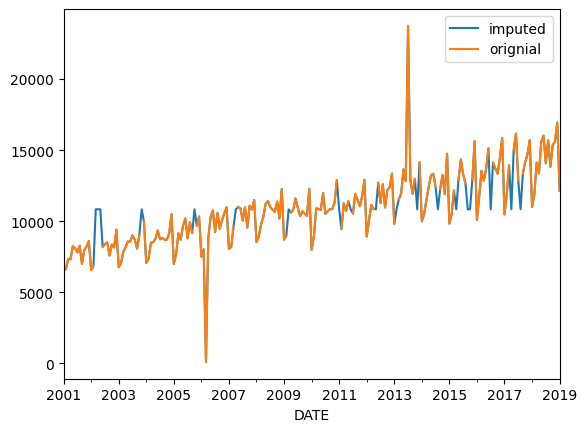

In [ ]:
# Replacing missing values with average/mean values
myntra_sales.Sales.fillna(myntra_sales.Sales.mean()).plot(label='imputed')
myntra_sales.Sales.plot(label='orignial')
plt.legend()

**Observation:** if we use common mean/median for imputation of missing data, for time-series, its not gona work(we can see sudden spike at missing values).

So we can use **Back Fill(bfill) or forward fill(ffill)  method** for missing value imputation instead of mean/median.

### bfill and ffill method



**bfill** : look at the ahead value and replace missing value with it.


*   6519 -- 6519
*   NaN  --- 7332
*   7332 -- 7332
*   NaN  --- 8240
*   8240 -- 8240

**ffill** : look at the previous value and replace missing value with it.


*   6519 -- 6519
*   NaN  --- 6519
*   7332 -- 7332
*   NaN  --- 7332
*   8240 -- 8240

In [ ]:
# bfill
myntra_sales.Sales.fillna(method='bfill')

DATE
2001-01-01     6519.0
2001-02-01     6654.0
2001-03-01     7332.0
2001-04-01     7332.0
2001-05-01     8240.0
               ...   
2018-09-01    13838.0
2018-10-01    15351.0
2018-11-01    15615.0
2018-12-01    16941.0
2019-01-01    12160.0
Name: Sales, Length: 217, dtype: float64

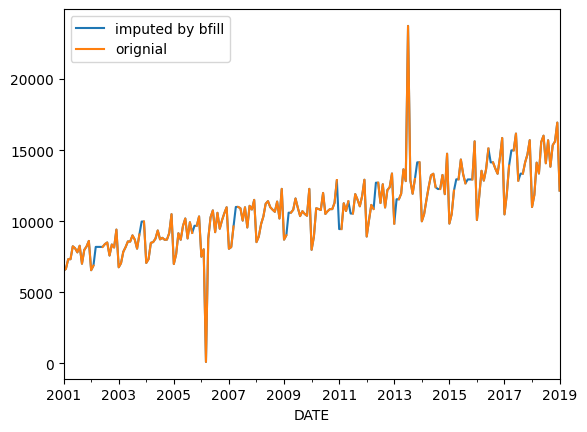

In [ ]:
myntra_sales.Sales.fillna(method='bfill').plot(label='imputed by bfill')
myntra_sales.Sales.plot(label='orignial')
plt.legend()

In [ ]:
# ffill
myntra_sales.Sales.fillna(method='ffill')

DATE
2001-01-01     6519.0
2001-02-01     6654.0
2001-03-01     7332.0
2001-04-01     7332.0
2001-05-01     8240.0
               ...   
2018-09-01    13838.0
2018-10-01    15351.0
2018-11-01    15615.0
2018-12-01    16941.0
2019-01-01    12160.0
Name: Sales, Length: 217, dtype: float64

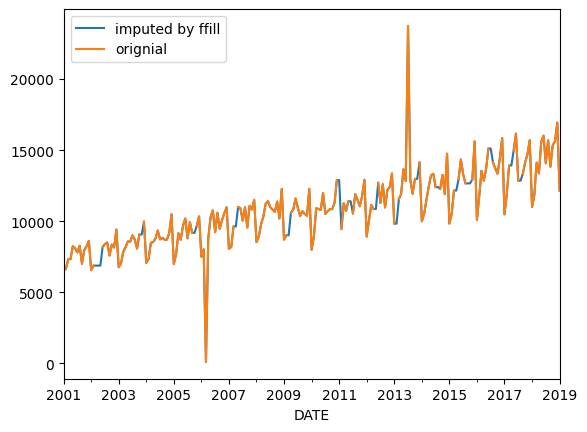

In [ ]:
myntra_sales.Sales.fillna(method='ffill').plot(label='imputed by ffill')
myntra_sales.Sales.plot(label='orignial')
plt.legend()

### Linear Interpolation Method

Average of bfill and ffill data

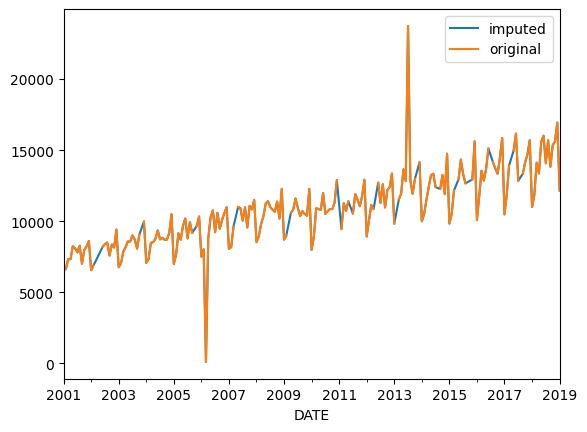

In [ ]:
myntra_sales.Sales.interpolate(method='linear').plot(label='imputed')
myntra_sales.Sales.plot(label='original')
plt.legend()

In [ ]:
myntra_sales.Sales = myntra_sales.Sales.interpolate(method='linear')

In [ ]:
myntra_sales.Sales.isnull().sum()

0

-----
## Handling Anomaly

[]

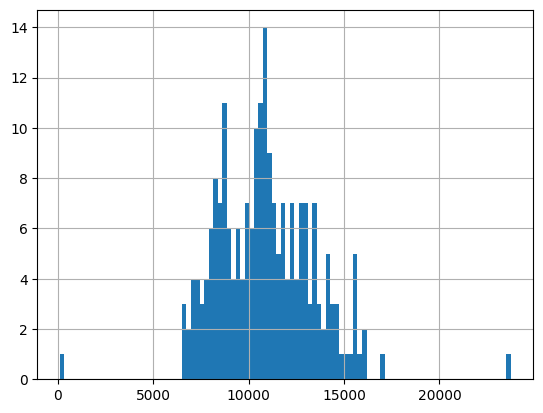

In [ ]:
myntra_sales['Sales'].hist(bins=100).plot() # or myntra_sales.Sales.hist(bins=100).plot()

**Observation:** Anything less than 5000 and greater than 20000, remove it

In [ ]:
myntra_sales.Sales.quantile(0.05)

7307.8

In [ ]:
myntra_sales.Sales.quantile(0.95)

15164.599999999997

<Axes: xlabel='DATE'>

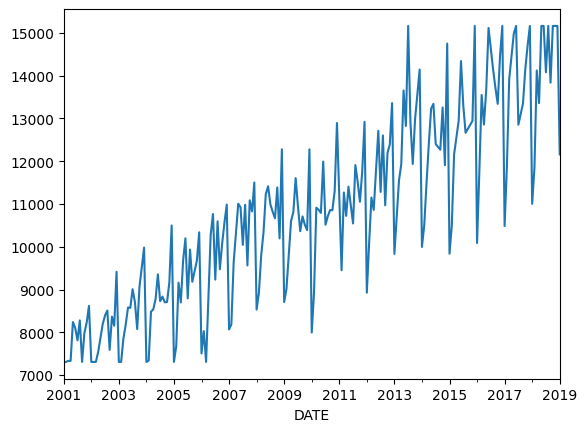

In [ ]:
# Method 2: anything greater than 95 percentile and less than 5 percentile, remove it
myntra_sales.Sales.clip(lower=myntra_sales.Sales.quantile(0.05), upper=myntra_sales.Sales.quantile(0.95)).plot()

In [ ]:
myntra_sales.Sales.clip(lower=myntra_sales.Sales.quantile(0.02), upper=myntra_sales.Sales.quantile(0.98),inplace=True)

<Axes: xlabel='DATE'>

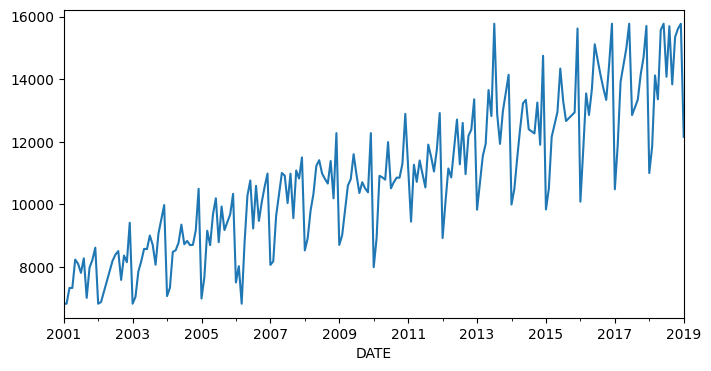

In [ ]:
myntra_sales.Sales.plot()

Observation: We can see Trend in data.

**Trend** : A “trend” is an upwards or downwards shift in a data set over time. Trends are continuous increases or decreases in a metric’s value.

**Seasonality**, on the other hand, reflects periodic (cyclical) patterns that occur in a system, usually rising above a baseline and then decreasing again.

### Smoothing Method:


#### Moving Average
Moving Average is a commonly used technique in time series analysis for smoothing out fluctuations and identifying trends in the data. It calculates the average value of a specified number of consecutive data points, known as the window or the lag, and uses that average as the smoothed value for the center of the window.
1. Simple Moving Average
2. Weighted Average

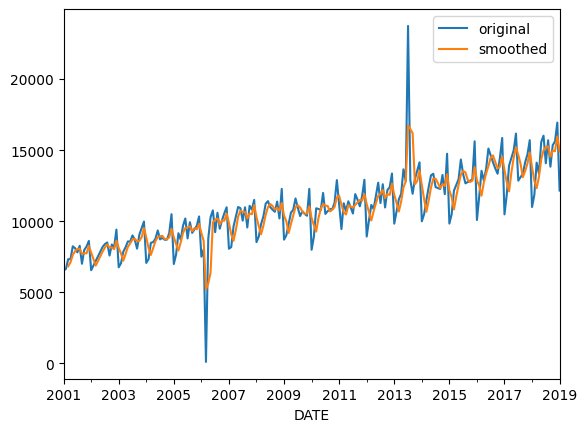

In [ ]:
myntra_sales.Sales.plot(label='original')
myntra_sales.Sales.rolling(3, center=False).mean().plot(label='smoothed') # False: look at previous value # True: look at previous and forward value
plt.legend()              # 3-> Previous three values
plt.legend()
plt.legend()

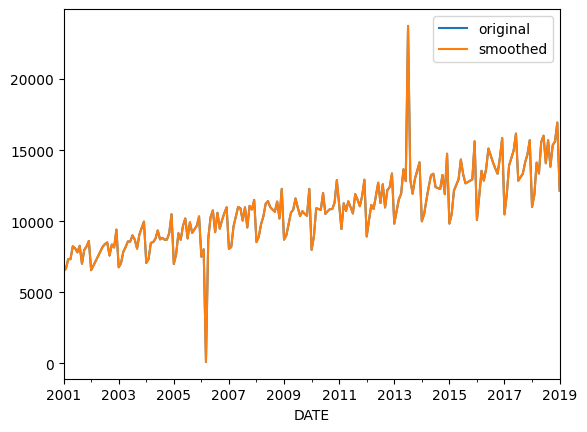

In [ ]:
# changing rolling window to 1
myntra_sales.Sales.plot(label='original')
myntra_sales.Sales.rolling(1, center=False).mean().plot(label='smoothed')
plt.legend()

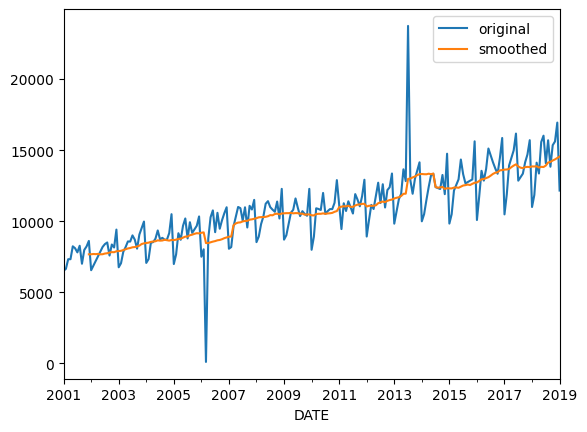

In [ ]:
# changing rolling window to 1
myntra_sales.Sales.plot(label='original')
myntra_sales.Sales.rolling(12, center=False).mean().plot(label='smoothed') # False: look at previous value
plt.legend()

**Observation:** Too much smooth when we increase rolling window to 12.

**Note:** Moving average can help us to figure out a trend line also.

#### centered approach
#(center=True): looking at previous as well as forward value


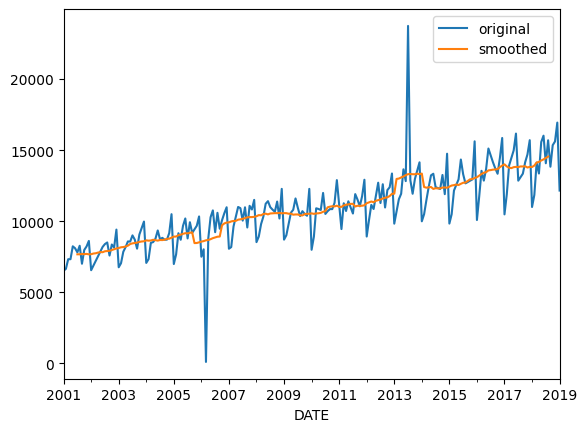

In [ ]:
myntra_sales.Sales.plot(label='original')
myntra_sales.Sales.rolling(12, center=True).mean().plot(label='smoothed')
plt.legend()

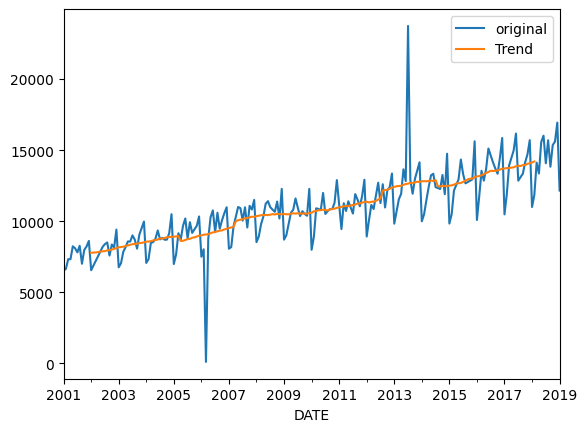

In [ ]:
myntra_sales.Sales.plot(label='original')
myntra_sales.Sales.rolling(24, center=True).mean().plot(label='Trend')
plt.legend()

**Seasonality types**:
1. Hourly Pattern
2. Weekly Pattern
3. Yearly Pattern

# seasonal_decompose
The seasonal_decompose() function in the statsmodels.tsa.seasonal module is used to decompose a time series into its constituent components: trend, seasonality, and residuals. This function helps in understanding the underlying patterns and structures within the data.

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.tsa.seasonal_decompose(myntra_sales.Sales,model='additive')

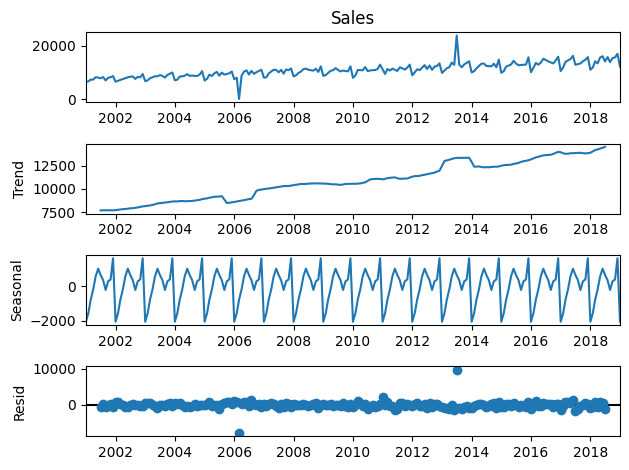

In [ ]:
model.plot();

resid = observed - trend - seasonal

The resid component represents the residuals or the remainder of the time series after removing the trend and seasonal components.

The **observed** attribute contains the original time series data.



Note: Errors not creating any short of pattern here. So we are all good with respact to this

<Axes: xlabel='DATE'>

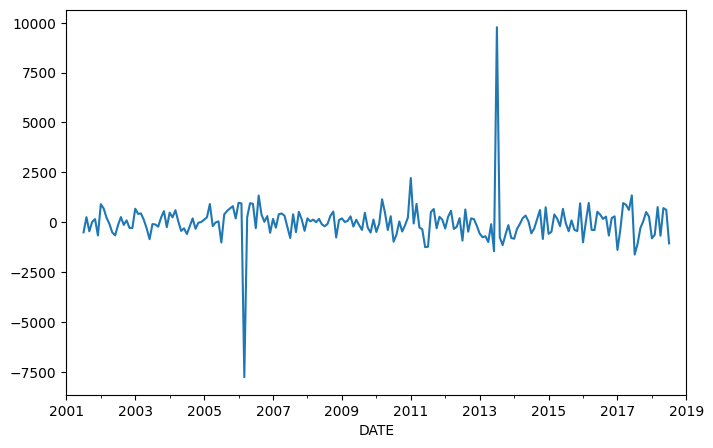

In [ ]:
# Ploting only resid/errors
model.resid.plot(figsize=(8, 5))
# plt.figure()

Observation: Values moving aroung zero only most of the time.

<Axes: >

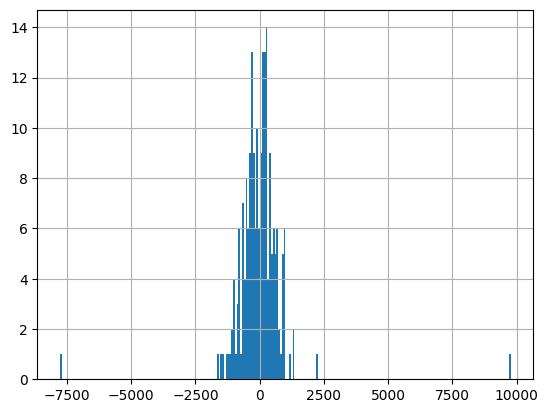

In [ ]:
# checking outlier values using histogram
model.resid.hist(bins=250)

In [ ]:
# checking average of resid/erros. It should be close to zero
model.resid.mean()

-5.492136437908002

In [ ]:
myntra_sales.tail(13)

,Sales
DATE,
2018-01-01,11005.0
2018-02-01,11852.0
2018-03-01,14123.0
2018-04-01,13360.0
2018-05-01,15576.0
2018-06-01,16021.0
2018-07-01,14080.0
2018-08-01,15697.0
2018-09-01,13838.0


In [ ]:
myntra_sales.index[-12]

Timestamp('2018-02-01 00:00:00')

In [ ]:
train_x = myntra_sales.loc[myntra_sales.index < myntra_sales.index[-12]]
test_x  = myntra_sales.loc[myntra_sales.index >=myntra_sales.index[-12]]

test_x


,Sales
DATE,
2018-02-01,11852.0
2018-03-01,14123.0
2018-04-01,13360.0
2018-05-01,15576.0
2018-06-01,16021.0
2018-07-01,14080.0
2018-08-01,15697.0
2018-09-01,13838.0
2018-10-01,15351.0


In [ ]:
# importing packages for erros
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape

)

In [ ]:
def performance(actual, predicted):
  print('MAE:', round(mae(actual,predicted),3))
  print('RMSE:', round(mse(actual,predicted)**0.5,3))
  print('MAPE:', round(mape(actual,predicted),3))

In [ ]:
train_x

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0
...,...
2017-09-01,13349.0
2017-10-01,14150.0
2017-11-01,14698.0


# Simple Forecasting/Prediction Method


### Mean Approach

In [ ]:
train_x['Sales'].mean()

10657.741463414633

In [ ]:
test_x

,Sales
DATE,
2018-02-01,11852.0
2018-03-01,14123.0
2018-04-01,13360.0
2018-05-01,15576.0
2018-06-01,16021.0
2018-07-01,14080.0
2018-08-01,15697.0
2018-09-01,13838.0
2018-10-01,15351.0


In [ ]:
test_x['pred'] = train_x['Sales'].mean()


In [ ]:
test_x

,Sales,pred
DATE,,
2018-02-01,11852.0,10657.741463
2018-03-01,14123.0,10657.741463
2018-04-01,13360.0,10657.741463
2018-05-01,15576.0,10657.741463
2018-06-01,16021.0,10657.741463
2018-07-01,14080.0,10657.741463
2018-08-01,15697.0,10657.741463
2018-09-01,13838.0,10657.741463
2018-10-01,15351.0,10657.741463


MAE: 3893.425
RMSE: 4175.798
MAPE: 0.259


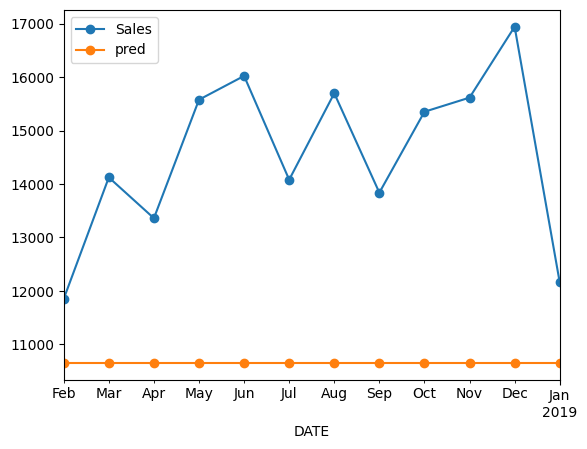

In [ ]:
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

Observation : Not a good approach

### Naive Approach

In [ ]:
train_x

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0
...,...
2017-09-01,13349.0
2017-10-01,14150.0
2017-11-01,14698.0


In [ ]:
train_x['Sales'][-1]

11005.0

In [ ]:
test_x['pred'] = train_x['Sales'][-1]


In [ ]:
test_x

,Sales,pred
DATE,,
2018-02-01,11852.0,11005.0
2018-03-01,14123.0,11005.0
2018-04-01,13360.0,11005.0
2018-05-01,15576.0,11005.0
2018-06-01,16021.0,11005.0
2018-07-01,14080.0,11005.0
2018-08-01,15697.0,11005.0
2018-09-01,13838.0,11005.0
2018-10-01,15351.0,11005.0


MAE: 3546.167
RMSE: 3854.067
MAPE: 0.235


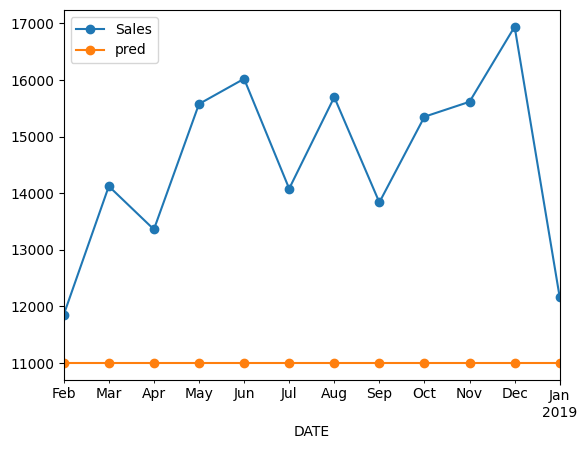

In [ ]:
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

Observation: Not a good approach

### Seasonal Naive Approach

In [ ]:
train_x.tail(12)

,Sales
DATE,
2017-02-01,11891.0
2017-03-01,13921.0
2017-04-01,14453.5
2017-05-01,14986.0
2017-06-01,16168.0
2017-07-01,12856.0
2017-08-01,13102.5
2017-09-01,13349.0
2017-10-01,14150.0


In [ ]:
for i in test_x.index:
  test_x.loc[i]['pred'] = train_x.loc[i - pd.DateOffset(years=1)]['Sales']

In [ ]:
test_x

,Sales,pred
DATE,,
2018-02-01,11852.0,11891.0
2018-03-01,14123.0,13921.0
2018-04-01,13360.0,14453.5
2018-05-01,15576.0,14986.0
2018-06-01,16021.0,16168.0
2018-07-01,14080.0,12856.0
2018-08-01,15697.0,13102.5
2018-09-01,13838.0,13349.0
2018-10-01,15351.0,14150.0


MAE: 907.417
RMSE: 1126.351
MAPE: 0.062


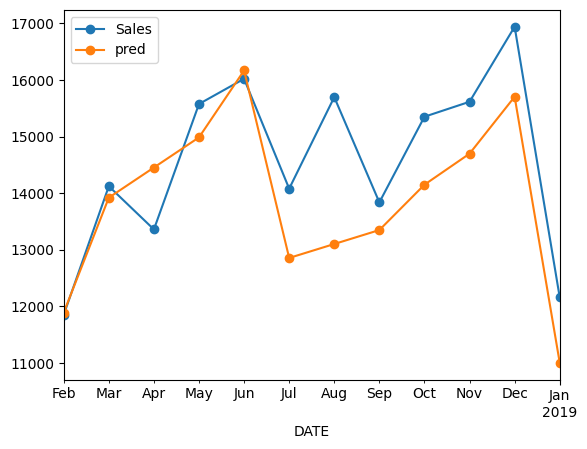

In [ ]:
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

In [ ]:
df = myntra_sales.copy()

In [ ]:
df

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0
...,...
2018-09-01,13838.0
2018-10-01,15351.0
2018-11-01,15615.0


In [ ]:
pd.DataFrame(index=pd.date_range(start=df.index[-1], periods=12, freq='MS')) # MS = Month Start

""
2019-01-01
2019-02-01
2019-03-01
2019-04-01
2019-05-01
2019-06-01
2019-07-01
2019-08-01
2019-09-01
2019-10-01


In [ ]:
df = df.append(pd.DataFrame(index=pd.date_range(start=df.index[-1], periods=13, freq='MS')[1:])) # MS = Month Start)
df.tail(20)

,Sales
2018-06-01,16021.0
2018-07-01,14080.0
2018-08-01,15697.0
2018-09-01,13838.0
2018-10-01,15351.0
2018-11-01,15615.0
2018-12-01,16941.0
2019-01-01,12160.0
2019-02-01,NaN
2019-03-01,NaN


In [ ]:
pred = df.Sales.dropna().values

In [ ]:
pred

array([ 6519.        ,  6654.        ,  7332.        ,  7332.        ,
        8240.        ,  8104.        ,  7813.        ,  8279.        ,
        7014.        ,  7985.        ,  8229.        ,  8618.        ,
        6558.        ,  6882.        ,  7211.        ,  7540.        ,
        7869.        ,  8198.        ,  8396.        ,  8510.        ,
        7589.        ,  8366.        ,  8156.        ,  9415.        ,
        6765.        ,  7048.        ,  7856.        ,  8181.        ,
        8581.        ,  8573.        ,  9008.        ,  8708.        ,
        8074.        ,  9068.        ,  9524.5       ,  9981.        ,
        7071.        ,  7339.        ,  8483.        ,  8536.        ,
        8774.        ,  9355.        ,  8728.        ,  8835.        ,
        8701.        ,  8709.        ,  9170.        , 10499.        ,
        6994.        ,  7675.        ,  9161.        ,  8699.        ,
        9682.        , 10198.        ,  8794.        ,  9935.        ,
      

In [ ]:
for i in range(12):
  pred = np.append(pred,pred[-3:].mean())

In [ ]:
pred[-20:]

array([16021.        , 14080.        , 15697.        , 13838.        ,
       15351.        , 15615.        , 16941.        , 12160.        ,
       14905.33333333, 14668.77777778, 13911.37037037, 14495.16049383,
       14358.43621399, 14254.98902606, 14369.52857796, 14327.65127267,
       14317.38962557, 14338.1898254 , 14327.74357455, 14327.77434184])

In [ ]:
df['pred'] = pred

In [ ]:
df.tail(20)

,Sales,pred
2018-06-01,16021.0,16021.000000
2018-07-01,14080.0,14080.000000
2018-08-01,15697.0,15697.000000
2018-09-01,13838.0,13838.000000
2018-10-01,15351.0,15351.000000
2018-11-01,15615.0,15615.000000
2018-12-01,16941.0,16941.000000
2019-01-01,12160.0,12160.000000
2019-02-01,NaN,14905.333333
2019-03-01,NaN,14668.777778


In [ ]:
df['Sales'].isna()

2001-01-01    False
2001-02-01    False
2001-03-01    False
2001-04-01    False
2001-05-01    False
              ...  
2019-09-01     True
2019-10-01     True
2019-11-01     True
2019-12-01     True
2020-01-01     True
Name: Sales, Length: 229, dtype: bool

In [ ]:
df.loc[~df['Sales'].isna(),'pred']

2001-01-01     6519.0
2001-02-01     6654.0
2001-03-01     7332.0
2001-04-01     7332.0
2001-05-01     8240.0
               ...   
2018-09-01    13838.0
2018-10-01    15351.0
2018-11-01    15615.0
2018-12-01    16941.0
2019-01-01    12160.0
Name: pred, Length: 217, dtype: float64

In [ ]:
df.loc[~df['Sales'].isna(),'pred'] = np.nan

In [ ]:
df

,Sales,pred
2001-01-01,6519.0,NaN
2001-02-01,6654.0,NaN
2001-03-01,7332.0,NaN
2001-04-01,7332.0,NaN
2001-05-01,8240.0,NaN
...,...,...
2019-09-01,NaN,14327.651273
2019-10-01,NaN,14317.389626
2019-11-01,NaN,14338.189825
2019-12-01,NaN,14327.743575


<Axes: >

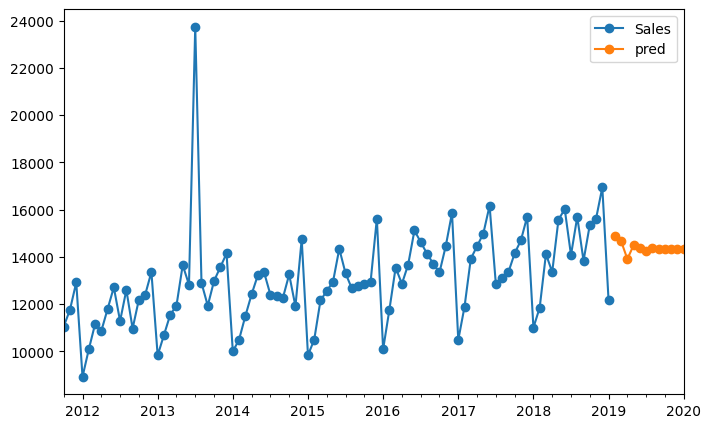

In [ ]:
df.tail(100).plot(style='-o',figsize=(8,5))
#plt.figure(figsize=(4,3))

MAE: 1331.454
RMSE: 1584.208
MAPE: 0.094


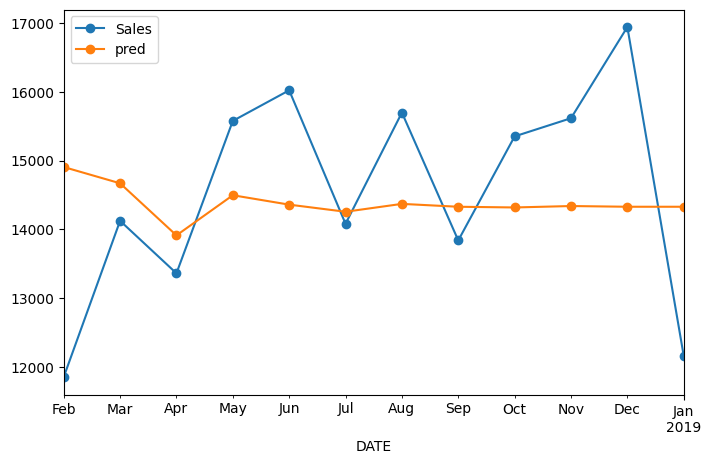

In [ ]:
test_x['pred'] = pred[-12:]
test_x.plot(style='-o',figsize=(8,5) )
performance(test_x['Sales'], test_x['pred'])

### Simple Exponential Smoothing

In [ ]:
model = pd.Series(sm.tsa.SimpleExpSmoothing(myntra_sales.Sales).fit(smoothing_level=0.8).fittedvalues) # alpha = 0.8

In [ ]:
model.head()

DATE
2001-01-01    6574.498188
2001-02-01    6530.099638
2001-03-01    6629.219928
2001-04-01    7191.443986
2001-05-01    7303.888797
dtype: float64

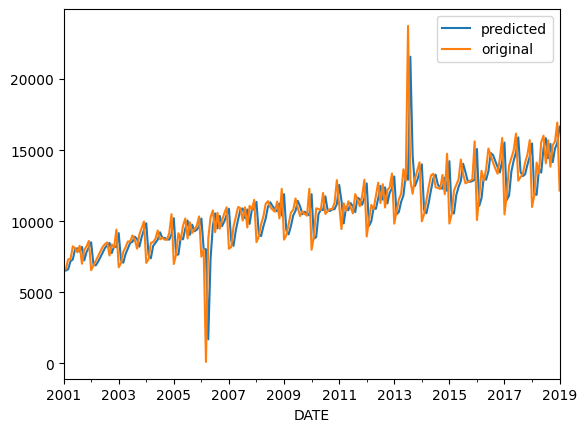

In [ ]:
model.plot(label='predicted')
myntra_sales.Sales.plot(label='original')
plt.legend()

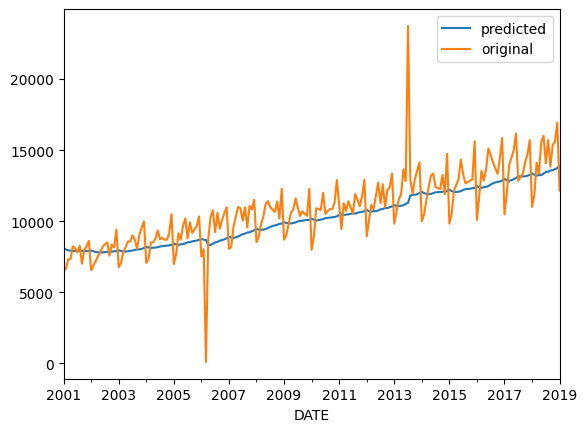

In [ ]:
# 1/2*seasonality => 1/2*12
model = pd.Series(sm.tsa.SimpleExpSmoothing(myntra_sales.Sales).fit(smoothing_level=1/(2*12)).fittedvalues)
model.plot(label='predicted')
myntra_sales.Sales.plot(label='original')
plt.legend()

Observation: We can see trend line here

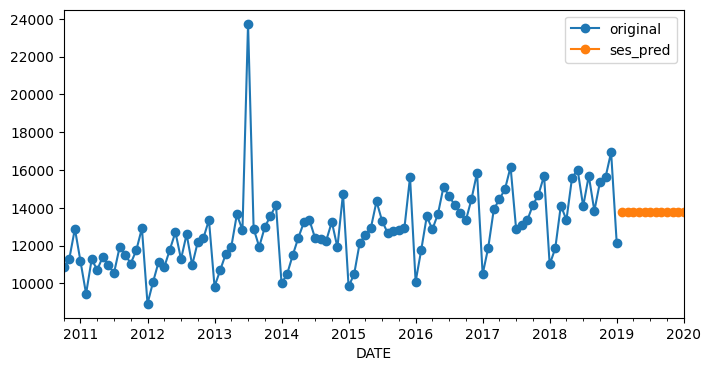

In [ ]:
# Forecasting
plt.figure(figsize=(8,4))
model = sm.tsa.SimpleExpSmoothing(myntra_sales.Sales).fit(smoothing_level=1/(2*12))
pred = model.forecast(steps=12)

myntra_sales.Sales.tail(100).plot(label='original', style='-o')

pred.plot(label='ses_pred', style='-o')
plt.legend()

MAE: 1703.418
RMSE: 1980.77
MAPE: 0.113


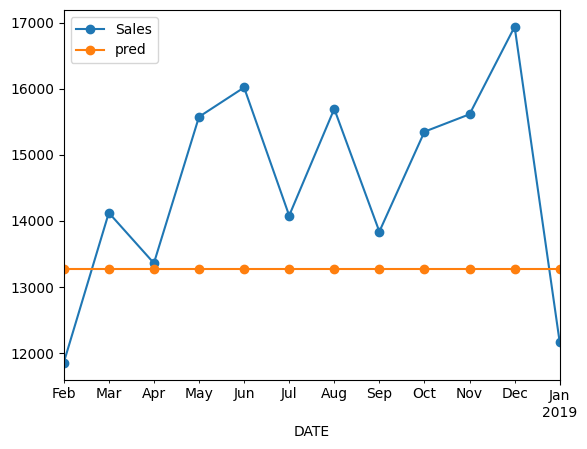

In [ ]:
model = sm.tsa.SimpleExpSmoothing(train_x.Sales).fit(smoothing_level=1/(2*12))
test_x['pred'] = model.forecast(steps=12)
test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

We are missing trand and seasonality here.

 Exponential smoothing can be extended to handle trend patterns by using a variant called **double exponential smoothing.**

---
# Double Exponential Smoothing(Holt's method or Holt's Linear Exponential Smoothing)

<Figure size 2500x1000 with 0 Axes>

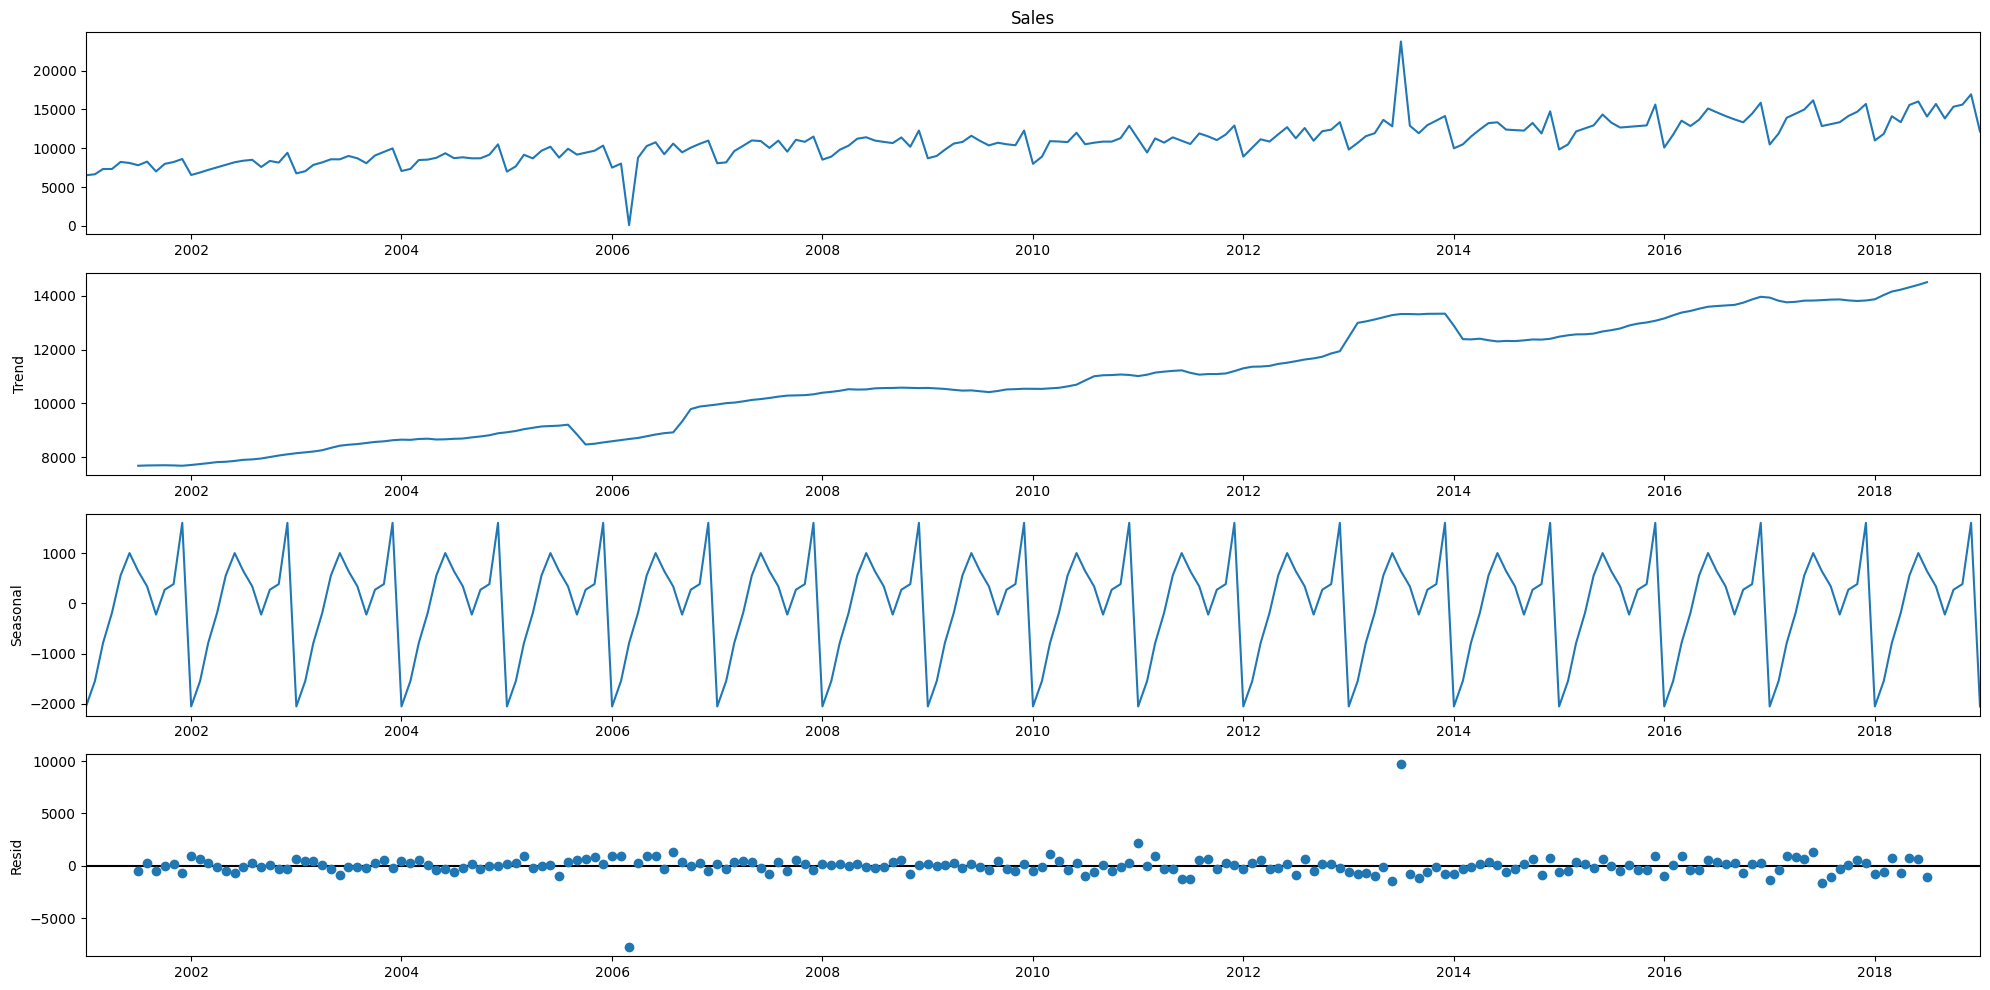

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(25, 10))
model = seasonal_decompose(myntra_sales['Sales'], model='additive')
model.plot()
plt.show()


In [ ]:
plt.rcParams['figure.figsize'] = (8,4)

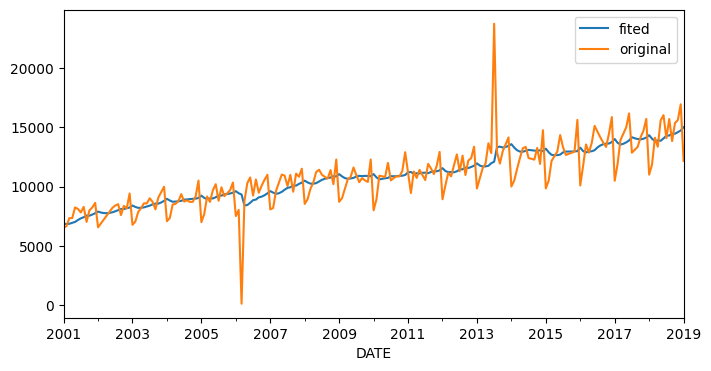

In [ ]:
plt.figure(figsize=(8,4))
model = sm.tsa.ExponentialSmoothing(myntra_sales.Sales, trend='add').fit()
model.fittedvalues.plot(label='fited')
myntra_sales.Sales.plot(label='original')
plt.legend()

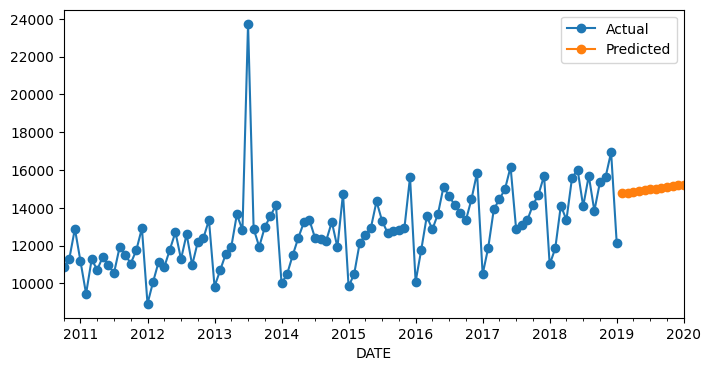

In [ ]:
plt.figure(figsize=(8,4))
pred = model.forecast(steps=12)
myntra_sales.Sales.tail(100).plot(style='-o', label='Actual')
pred.plot(style='-o', label='Predicted')
plt.legend()

MAE: 1275.319
RMSE: 1498.624
MAPE: 0.089


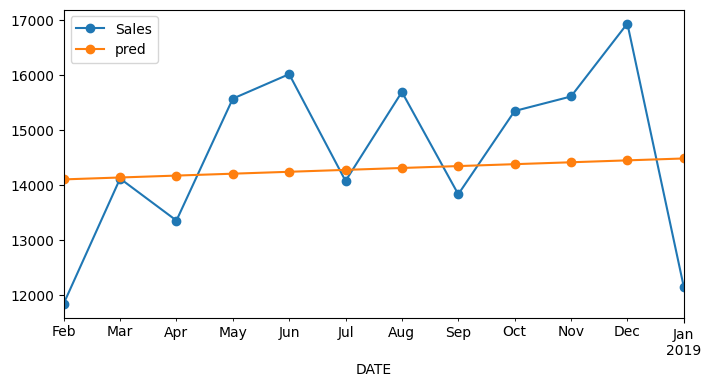

In [ ]:
model = sm.tsa.ExponentialSmoothing(train_x.Sales, trend='add').fit(smoothing_level=1/(2*12))
test_x['pred'] = model.forecast(steps=12)
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])


# Triple Exponential Smoothing(Holt-Winters)
 Extension of Double Exponential Smoothing that incorporates both trend and seasonality in time series forecasting. It is suitable for data that exhibit trend and seasonality patterns.

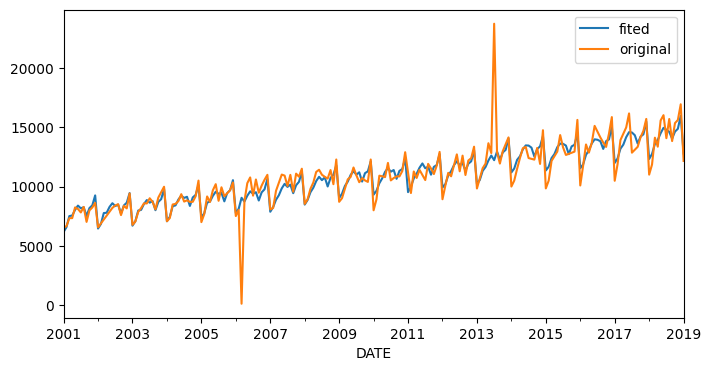

In [ ]:
plt.figure(figsize=(8,4))
model = sm.tsa.ExponentialSmoothing(myntra_sales.Sales, trend='add', seasonal='add').fit()
model.fittedvalues.plot(label='fited')
myntra_sales.Sales.plot(label='original')
plt.legend()

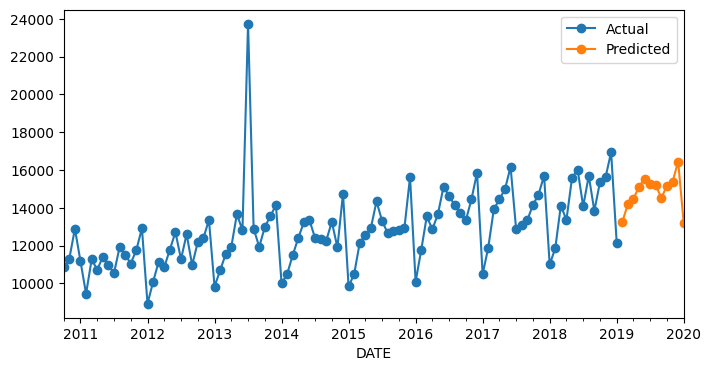

In [ ]:
plt.figure(figsize=(8,4))
pred = model.forecast(steps=12)
myntra_sales.Sales.tail(100).plot(style='-o', label='Actual')
pred.plot(style='-o', label='Predicted')
plt.legend()

MAE: 766.244
RMSE: 816.738
MAPE: 0.052


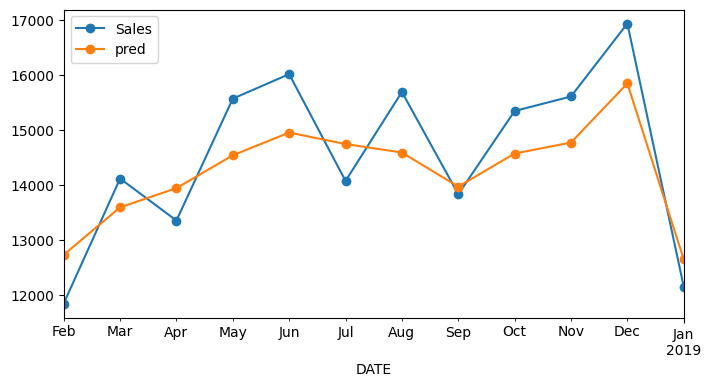

In [ ]:
model = sm.tsa.ExponentialSmoothing(train_x.Sales, trend='add', seasonal='add').fit(smoothing_level=1/(2*12))
test_x['pred'] = model.forecast(steps=12)
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])


---
**Statioary Time-Series**:

A stationary time series is a time series where the statistical properties, such as the mean and variance, remain constant over time. Stationarity is an important concept in time series analysis because many time series models, including ARIMA models, rely on the assumption of stationarity for accurate forecasting and analysis.

Here are the key characteristics of a stationary time series:

* Constant Mean: The mean of the time series remains constant over time. In other words, the average value of the series does not change as time progresses.

* Constant Variance: The variance of the time series remains constant over time. It represents the spread or dispersion of the data points around the mean.

* Constant Autocovariance: The autocovariance between any two observations in the time series depends only on the time lag between them and not on the specific time at which they are observed. This implies that the dependence structure of the series does not change over time.

* Absence of Trend: The time series does not exhibit any long-term upward or downward trend. A stationary series may still have short-term fluctuations and seasonal patterns.

It's important to note that achieving stationarity is not always straightforward. Many real-world time series exhibit non-stationary behavior due to factors such as trends, seasonality, and other systematic patterns. In such cases, pre-processing techniques like differencing or transformations may be required to make the series stationary.

Why is stationarity important?

* Model Assumptions: Many time series models, such as ARIMA, assume stationarity. By ensuring stationarity, you can make sure that the model assumptions are met, leading to more reliable and accurate forecasts.

* Statistical Analysis: Stationary time series allow for the use of statistical tools and techniques, such as calculating confidence intervals, hypothesis testing, and estimating model parameters.

* Forecasting: Stationary series tend to exhibit more consistent and predictable patterns, making forecasting more reliable and easier to interpret.

To determine if a time series is stationary, you can visually inspect the data plot, check for constant mean and variance, or perform statistical tests like the **Augmented Dickey-Fuller (ADF)** test. If the time series is found to be non-stationary, techniques like differencing, log-transformations, or seasonal adjustments can be applied to achieve stationarity.

Overall, understanding and identifying stationary time series is essential for developing accurate time series models and making reliable forecasts.

# Dickey-Fuller Test

In [ ]:
# H0 : Not Stationary
# Ha : Stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(myntra_sales['Sales'])

# Extract and print the results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)
print('Critical Values:')
for key, value in critical_values.items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -0.14111524774617235
p-value: 0.9451861677902991
Critical Values:
	1%: -3.4626576734812318
	5%: -2.8757444215841326
	10%: -2.5743412314098753


In [ ]:
# or

sm.tsa.stattools.adfuller(myntra_sales.Sales)[1]

0.9451861677902991

p_value > 0.05, so fail to reject Null Hypothesis. So series is not stationary

In [ ]:
def adf_test(dataset):
  p_value = sm.tsa.stattools.adfuller(dataset)[1]
  print('p_value: ',p_value)

  if p_value <=0.05:
    print("Sequance is stationary")
  else:
    print("Squance is not stationary")

In [ ]:
adf_test(myntra_sales.Sales)

p_value:  0.9451861677902991
Squance is not stationary


---
# De-trending

Detrending is a process of removing or modeling the underlying trend component from a time series. The trend represents the long-term upward or downward movement in the data, which may obscure other patterns and make it difficult to analyze or forecast the series accurately.

<Axes: xlabel='DATE'>

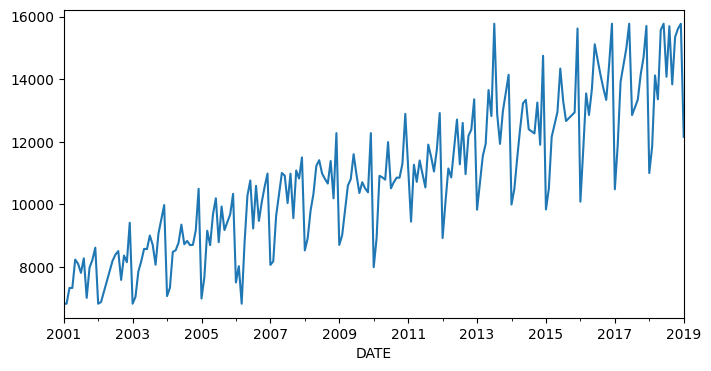

In [ ]:
myntra_sales.Sales.plot()

In [ ]:
myntra_sales.Sales.head()

DATE
2001-01-01    6827.8992
2001-02-01    6827.8992
2001-03-01    7332.0000
2001-04-01    7332.0000
2001-05-01    8240.0000
Name: Sales, dtype: float64

In [ ]:
myntra_sales.Sales.diff().head()

DATE
2001-01-01         NaN
2001-02-01      0.0000
2001-03-01    504.1008
2001-04-01      0.0000
2001-05-01    908.0000
Name: Sales, dtype: float64

<Axes: xlabel='DATE'>

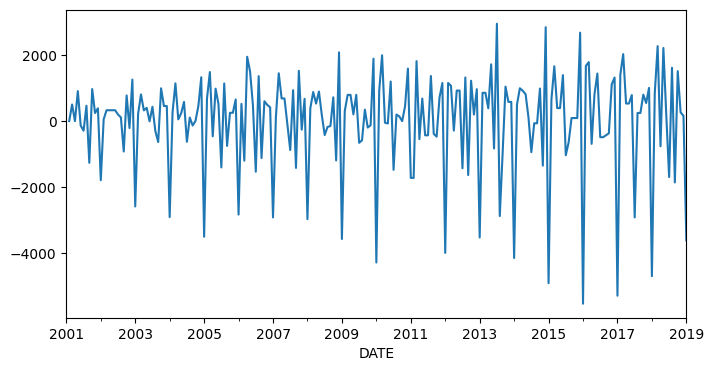

In [ ]:
detrend = myntra_sales.Sales.diff()
detrend.plot()

# De-Seasonalising

De-seasonalizing a time series refers to the process of removing or modeling the seasonal component from the data. Seasonality represents recurring patterns or cycles that occur at fixed intervals within the time series, such as daily, weekly, monthly, or yearly patterns. By de-seasonalizing the data, you can focus on the underlying trend and other non-seasonal patterns in the time series.

<Axes: xlabel='DATE'>

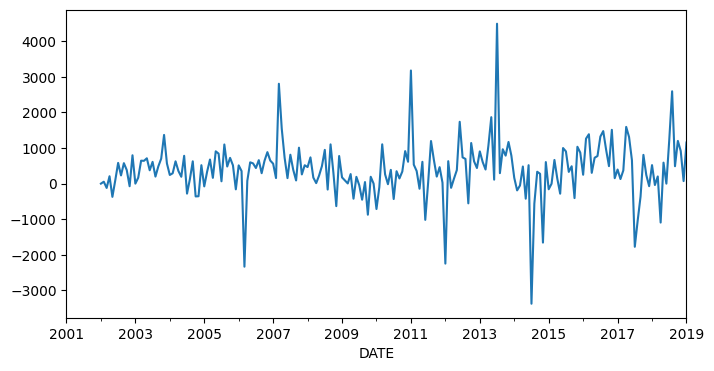

In [ ]:
deseas = myntra_sales.Sales.diff(12) # difference with previous last year value
deseas.plot()

<Axes: xlabel='DATE'>

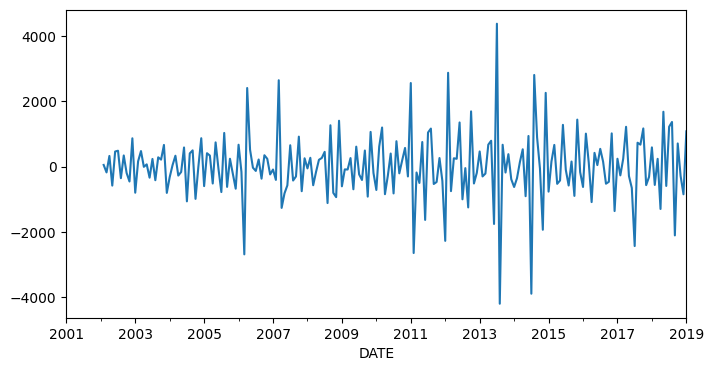

In [ ]:
# Doing De-Trending and De-Seasonalising together
stationary = myntra_sales.Sales.diff(1).diff(12)
stationary.plot()

In [ ]:
adf_test(stationary.dropna())

p_value:  1.536699509556203e-06
Sequance is stationary


---
# Autocorrelation and Partial Autocorrelation

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


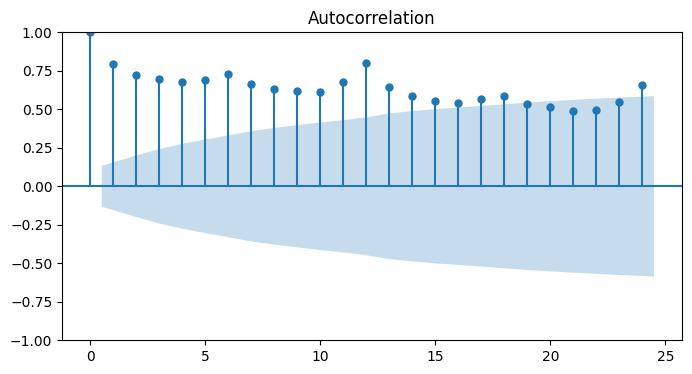

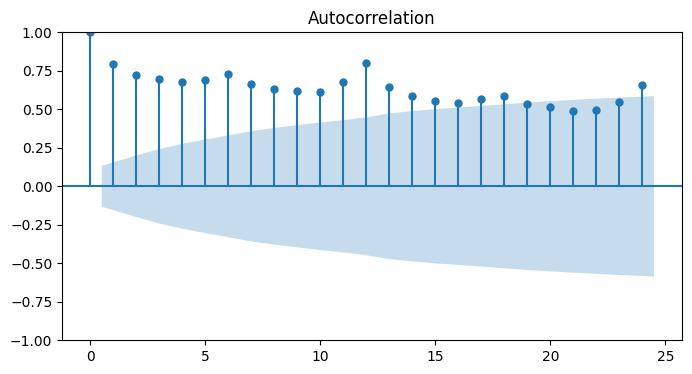

In [ ]:
plot_acf(myntra_sales.Sales)


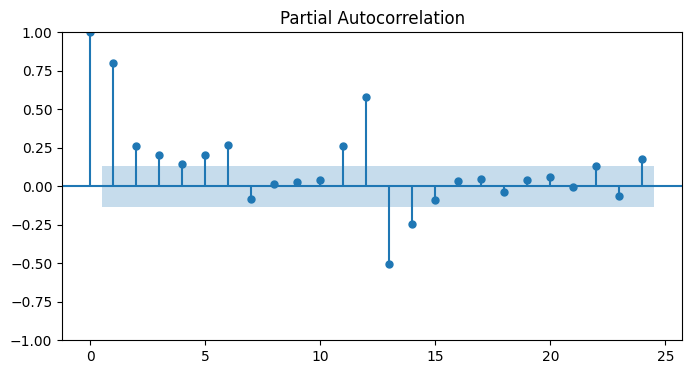

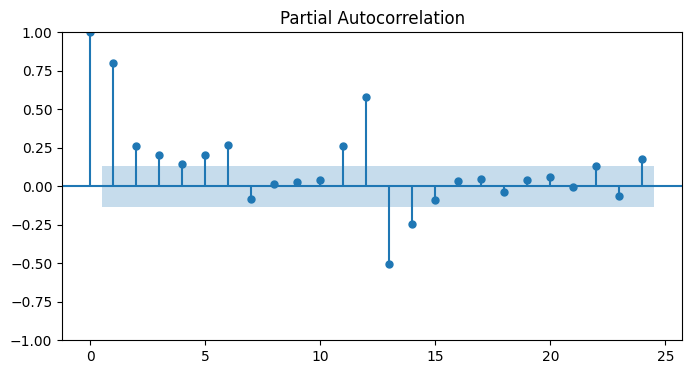

In [ ]:
plot_pacf(myntra_sales.Sales)